In [2]:
%pip install lxml
%pip install html5lib
%pip install beautifulsoup4
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import requests

# The 27 Club: Conspiracy or Coincidence?

## Basically I'm bored and want to do some data analysis projects to enhance my skillset. So will be analysing all the data I can gather on the 27 club through webscraping

I was planning on using the read_html function to download the table straight from the internet, but for some reason it was giving me the error 'No table found', so I just copied the table into a csv and imported that instead

In [3]:
data = pd.read_csv('27Club.csv', index_col='Name') #reading 27 club wiki CSV into DataFrame

In [4]:
data.head()

,Date of birth,Date of death,Cause of death,Fame,Age,Sources
Name,,,,,,
Alexandre Levy,"November 10, 1864","January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40]
Louis Chauvin,"March 13, 1881","March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40]
Rupert Brooke,"August 3, 1887","April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41]
Robert Johnson,"May 8, 1911","August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36]
Ghazi of Iraq,"March 21, 1912","April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, Alexandre Levy to Cole Brings Plenty
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date of birth   88 non-null     object
 1   Date of death   88 non-null     object
 2   Cause of death  88 non-null     object
 3   Fame            88 non-null     object
 4   Age             88 non-null     object
 5   Sources         88 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


## Expanding the Data

To expand upon the data and make it easier to analyse, I created a second csv sheet which categorised the cause of death and cause of fame into categories and also added in a 'suspicious' column to indicate if there was any controversy or suspected foul play surrounded the death of the aforementioned celebrity

In [6]:
exp_data = pd.read_csv('27Club_expanded.csv', index_col='Name')

In [7]:
exp_data = exp_data.rename(columns={'Cause of death': 'Death Cause'})

In [8]:
exp_data.head()

,Death Cause,Fame Source,Suspicious?
Name,,,
Alexandre Levy,Unknown,Musician,N
Louis Chauvin,Illness,Musician,N
Rupert Brooke,Illness,Poet,N
Robert Johnson,Unknown,Musician,N
Ghazi of Iraq,Vehicle Accident,Royalty,Y


## Merging the Datasets Together

In [9]:
celeb_data = data.join(exp_data)

In [10]:
celeb_data.head()

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?
Name,,,,,,,,,
Alexandre Levy,"November 10, 1864","January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N
Louis Chauvin,"March 13, 1881","March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N
Rupert Brooke,"August 3, 1887","April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41],Illness,Poet,N
Robert Johnson,"May 8, 1911","August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N
Ghazi of Iraq,"March 21, 1912","April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Royalty,Y


## Cleaning Cause of Death and Fame Source Data 

In [11]:
celeb_data['Death Cause'].value_counts()

Death Cause
Illness             21
Vehicle Accident    18
Drug Related        18
Suicide             10
Murder               9
Accident             7
Unknown              4
Ilnness              1
Name: count, dtype: int64

In [12]:
celeb_data.loc[celeb_data['Death Cause'] == 'Ilnness', 'Death Cause'] = 'Illness' #Finding specific misspelt Death cause cell and changing it to the correct value


In [13]:
celeb_data['Death Cause'].value_counts()

Death Cause
Illness             22
Vehicle Accident    18
Drug Related        18
Suicide             10
Murder               9
Accident             7
Unknown              4
Name: count, dtype: int64

We can now see that the misspelt 'Ilnness' cell has been changed to the proper 'Illness' spelling

Now we check the 'Fame Source' column

In [14]:
celeb_data['Fame Source'].value_counts()

Fame Source
Musician                      63
Actor                          9
Sportsman                      6
By Association/Personality     5
Artist                         2
Poet                           1
Royalty                        1
Revolutionary                  1
Name: count, dtype: int64

This all looks good but many of the values only appear 1-2 times. To make the data easier to analyse, I will make a copy dataset where Artists, Poets, Royalty and Revolutionary are all reclassified as 'Other'

In [15]:
celeb_data_copy = celeb_data.copy()
celeb_data_copy.loc[celeb_data_copy['Fame Source'] == 'Poet', 'Fame Source'] = 'Other'  #Changing values that only appear once to all be 'Other'
celeb_data_copy.loc[celeb_data_copy['Fame Source'] == 'Revolutionary', 'Fame Source'] = 'Other'
celeb_data_copy.loc[celeb_data_copy['Fame Source'] == 'Royalty', 'Fame Source'] = 'Other'
celeb_data_copy.loc[celeb_data_copy['Fame Source'] == 'Artist', 'Fame Source'] = 'Other'

In [16]:
celeb_data_copy['Fame Source'].value_counts()

Fame Source
Musician                      63
Actor                          9
Sportsman                      6
Other                          5
By Association/Personality     5
Name: count, dtype: int64

Now the data should be a bit easier to analyse


## Transforming and Cleaning Birth Date Columns 

In [17]:
celeb_data_copy

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?
Name,,,,,,,,,
Alexandre Levy,"November 10, 1864","January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N
Louis Chauvin,"March 13, 1881","March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N
Rupert Brooke,"August 3, 1887","April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N
Robert Johnson,"May 8, 1911","August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N
Ghazi of Iraq,"March 21, 1912","April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y
...,...,...,...,...,...,...,...,...,...
Yung Trappa [ru],"August 14, 1995","February 2, 2023",Overdose,Russian rapper,"27 years, 172 days",[92],Drug Related,Musician,N
Julián Figueroa [es],"May 27, 1995","April 2, 2023",Myocardial infarction and Ventricular fibrilla...,"Singer, actor, and composer","27 years, 310 days",[93][94],Illness,Musician,N
MohBad,"January 3, 1996","September 12, 2023",Undetermined,Nigerian rapper,"27 years, 252 days",[95],Illness,Musician,Y


Looking at this dataframe we can see that the celebrity Cole Brings Plenty's date of birth is formatted differently to only have the year. Upon googling it we can see that his Birthdate is the 18th of August 1996, so in order for the following code to work his date of birth must be updated.

In [18]:
celeb_data_copy.loc['Cole Brings Plenty','Date of birth'] = 'August 18, 1996' #Updating Cole Brings Plenty's DOB to same format as others
celeb_data_copy

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?
Name,,,,,,,,,
Alexandre Levy,"November 10, 1864","January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N
Louis Chauvin,"March 13, 1881","March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N
Rupert Brooke,"August 3, 1887","April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N
Robert Johnson,"May 8, 1911","August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N
Ghazi of Iraq,"March 21, 1912","April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y
...,...,...,...,...,...,...,...,...,...
Yung Trappa [ru],"August 14, 1995","February 2, 2023",Overdose,Russian rapper,"27 years, 172 days",[92],Drug Related,Musician,N
Julián Figueroa [es],"May 27, 1995","April 2, 2023",Myocardial infarction and Ventricular fibrilla...,"Singer, actor, and composer","27 years, 310 days",[93][94],Illness,Musician,N
MohBad,"January 3, 1996","September 12, 2023",Undetermined,Nigerian rapper,"27 years, 252 days",[95],Illness,Musician,Y


In [19]:
celeb_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, Alexandre Levy to Cole Brings Plenty
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date of birth   88 non-null     object
 1   Date of death   88 non-null     object
 2   Cause of death  88 non-null     object
 3   Fame            88 non-null     object
 4   Age             88 non-null     object
 5   Sources         88 non-null     object
 6   Death Cause     88 non-null     object
 7   Fame Source     88 non-null     object
 8   Suspicious?     88 non-null     object
dtypes: object(9)
memory usage: 4.5+ KB


We can see that all the data here is 'object' type, in order to manipulate the data, this must be converted from an object data type into a date

In [20]:
celeb_data_copy[['Birth Month', 'Birth Day', 'Birth Year']] = celeb_data_copy['Date of birth'].str.split(' ', expand=True) #splitting Date of Birth Column into three seperate ones
celeb_data_copy['Birth Day'] = celeb_data_copy['Birth Day'].str.replace(',', '') # removing ',' character from Birth day column
celeb_data_copy

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year
Name,,,,,,,,,,,,
Alexandre Levy,"November 10, 1864","January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N,November,10,1864
Louis Chauvin,"March 13, 1881","March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N,March,13,1881
Rupert Brooke,"August 3, 1887","April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N,August,3,1887
Robert Johnson,"May 8, 1911","August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N,May,8,1911
Ghazi of Iraq,"March 21, 1912","April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y,March,21,1912
...,...,...,...,...,...,...,...,...,...,...,...,...
Yung Trappa [ru],"August 14, 1995","February 2, 2023",Overdose,Russian rapper,"27 years, 172 days",[92],Drug Related,Musician,N,August,14,1995
Julián Figueroa [es],"May 27, 1995","April 2, 2023",Myocardial infarction and Ventricular fibrilla...,"Singer, actor, and composer","27 years, 310 days",[93][94],Illness,Musician,N,May,27,1995
MohBad,"January 3, 1996","September 12, 2023",Undetermined,Nigerian rapper,"27 years, 252 days",[95],Illness,Musician,Y,January,3,1996


In [21]:
celeb_data_copy['Birth Month'].value_counts() #checking if any of the month values are not formatted correctly

Birth Month
May          14
December     10
March         9
February      8
April         8
July          8
August        6
June          6
November      5
January       5
October       4
September     4
May-88        1
Name: count, dtype: int64

In [22]:
celeb_data_copy['Birth Month'].replace('May-88', 'May', inplace=True)

<ipython-input-22-11c8ce7a1045>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  celeb_data_copy['Birth Month'].replace('May-88', 'May', inplace=True)


In [23]:
celeb_data_copy['Birth Month'].value_counts() #checking if any of the month values are not formatted correctly

Birth Month
May          15
December     10
March         9
February      8
April         8
July          8
August        6
June          6
November      5
January       5
October       4
September     4
Name: count, dtype: int64

The month value has been updated, but since it was incorrect, I can assume the DOB, Birth day and Birth Year columns are all incorrect too. The below code shows me the row in need of fixing.

In [24]:
celeb_data_copy.loc[celeb_data_copy['Date of birth'] == 'May-88' ] #checking for incorrect values 


,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year
Name,,,,,,,,,,,,
Tomas Lowe,May-88,"February 13, 2016",Car accident,bassist of Viola Beach,"27 years, 9 months",[81],Vehicle Accident,Musician,N,May,None,None


By googling Tomas Lowe, I can see his birth date was the 1st of May 1988. The below code will clean up that row for me

In [25]:
celeb_data_copy.loc['Tomas Lowe','Date of birth'] = '1 May 1988' #Updating Tomas Lowe's DOB to same format as others
celeb_data_copy.loc['Tomas Lowe','Birth Day'] = '1'
celeb_data_copy.loc['Tomas Lowe','Birth Year'] = '1988'
celeb_data_copy.loc[celeb_data_copy['Date of birth'] == '1 May 1988' ] #checking for incorrect value


,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year
Name,,,,,,,,,,,,
Tomas Lowe,1 May 1988,"February 13, 2016",Car accident,bassist of Viola Beach,"27 years, 9 months",[81],Vehicle Accident,Musician,N,May,1,1988


All looks good to continue forward. Now I will convert the months from a string to number 

In [26]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,'July':7,'August':8,'September':9,'October':10, 'November':11,'December':12 }

In [27]:
celeb_data_copy['Birth Month'] = celeb_data_copy['Birth Month'].map(d).astype(str) #Converting month into a number


In [28]:
celeb_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, Alexandre Levy to Cole Brings Plenty
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date of birth   88 non-null     object
 1   Date of death   88 non-null     object
 2   Cause of death  88 non-null     object
 3   Fame            88 non-null     object
 4   Age             88 non-null     object
 5   Sources         88 non-null     object
 6   Death Cause     88 non-null     object
 7   Fame Source     88 non-null     object
 8   Suspicious?     88 non-null     object
 9   Birth Month     88 non-null     object
 10  Birth Day       88 non-null     object
 11  Birth Year      88 non-null     object
dtypes: object(12)
memory usage: 5.5+ KB


In [32]:
celeb_data_copy['Date of birth'] = celeb_data_copy['Birth Year'] + '-' + celeb_data_copy['Birth Month'] + '-' + celeb_data_copy['Birth Day'] #combining all seperate date components into original date of birth column

In [36]:
celeb_data_copy['Date of birth'] = pd.to_datetime(celeb_data_copy['Date of birth']) #converting date into date type object
celeb_data_copy

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year,Date of Birth
Name,,,,,,,,,,,,,
Alexandre Levy,1864-11-10,"January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N,11,10,1864,1864-11-10
Louis Chauvin,1881-03-13,"March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N,3,13,1881,1881-03-13
Rupert Brooke,1887-08-03,"April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N,8,3,1887,1887-08-03
Robert Johnson,1911-05-08,"August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N,5,8,1911,1911-05-08
Ghazi of Iraq,1912-03-21,"April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y,3,21,1912,1912-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yung Trappa [ru],1995-08-14,"February 2, 2023",Overdose,Russian rapper,"27 years, 172 days",[92],Drug Related,Musician,N,8,14,1995,1995-08-14
Julián Figueroa [es],1995-05-27,"April 2, 2023",Myocardial infarction and Ventricular fibrilla...,"Singer, actor, and composer","27 years, 310 days",[93][94],Illness,Musician,N,5,27,1995,1995-05-27
MohBad,1996-01-03,"September 12, 2023",Undetermined,Nigerian rapper,"27 years, 252 days",[95],Illness,Musician,Y,1,3,1996,1996-01-03


## Transforming and Cleaning Death Date Columns 

This section will follow a very similar process to the birth date section.

In [37]:
celeb_data_copy[['Death Month', 'Death Day', 'Death Year']] = celeb_data_copy['Date of death'].str.split(' ', expand=True) #splitting Date of death Column into three seperate ones
celeb_data_copy['Death Day'] = celeb_data_copy['Death Day'].str.replace(',', '') # removing ',' character from death day column

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year,Date of Birth,Death Month,Death Day,Death Year
Name,,,,,,,,,,,,,,,,
Alexandre Levy,1864-11-10,"January 17, 1892",Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N,11,10,1864,1864-11-10,January,17,1892
Louis Chauvin,1881-03-13,"March 26, 1908",Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N,3,13,1881,1881-03-13,March,26,1908
Rupert Brooke,1887-08-03,"April 23, 1915",Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N,8,3,1887,1887-08-03,April,23,1915
Robert Johnson,1911-05-08,"August 16, 1938",Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N,5,8,1911,1911-05-08,August,16,1938
Ghazi of Iraq,1912-03-21,"April 4, 1939","Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y,3,21,1912,1912-03-21,April,4,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yung Trappa [ru],1995-08-14,"February 2, 2023",Overdose,Russian rapper,"27 years, 172 days",[92],Drug Related,Musician,N,8,14,1995,1995-08-14,February,2,2023
Julián Figueroa [es],1995-05-27,"April 2, 2023",Myocardial infarction and Ventricular fibrilla...,"Singer, actor, and composer","27 years, 310 days",[93][94],Illness,Musician,N,5,27,1995,1995-05-27,April,2,2023
MohBad,1996-01-03,"September 12, 2023",Undetermined,Nigerian rapper,"27 years, 252 days",[95],Illness,Musician,Y,1,3,1996,1996-01-03,September,12,2023


In [39]:
celeb_data_copy['Death Month'].value_counts() #checking if any of the month values are not formatted correctly

Death Month
July         12
March        11
April        10
August        8
February      8
September     8
June          7
December      6
October       5
May           5
January       4
November      4
Name: count, dtype: int64

All month dates seem to be correct, so no issues there

In [45]:
celeb_data_copy.loc[celeb_data_copy['Death Day'].isnull() ] #checking for null values 


,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year,Date of Birth,Death Month,Death Day,Death Year
Name,,,,,,,,,,,,,,,,


In [46]:
celeb_data_copy.loc[celeb_data_copy['Death Year'].isnull() ] #checking for null values 


,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year,Date of Birth,Death Month,Death Day,Death Year
Name,,,,,,,,,,,,,,,,


All the death dates are correctly formatted and shouldn't need any transforming! Yay

In [47]:
celeb_data_copy['Death Month'] = celeb_data_copy['Death Month'].map(d).astype(str) #Converting month into a number
celeb_data_copy['Date of death'] = celeb_data_copy['Death Year'] + '-' + celeb_data_copy['Death Month'] + '-' + celeb_data_copy['Death Day'] #combining all seperate date components into original date of birth column
celeb_data_copy['Date of birth'] = pd.to_datetime(celeb_data_copy['Date of birth']) #converting date into date type object

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year,Date of Birth,Death Month,Death Day,Death Year
Name,,,,,,,,,,,,,,,,
Alexandre Levy,1864-11-10,1892-1-17,Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N,11,10,1864,1864-11-10,1,17,1892
Louis Chauvin,1881-03-13,1908-3-26,Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N,3,13,1881,1881-03-13,3,26,1908
Rupert Brooke,1887-08-03,1915-4-23,Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N,8,3,1887,1887-08-03,4,23,1915
Robert Johnson,1911-05-08,1938-8-16,Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N,5,8,1911,1911-05-08,8,16,1938
Ghazi of Iraq,1912-03-21,1939-4-4,"Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y,3,21,1912,1912-03-21,4,4,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yung Trappa [ru],1995-08-14,2023-2-2,Overdose,Russian rapper,"27 years, 172 days",[92],Drug Related,Musician,N,8,14,1995,1995-08-14,2,2,2023
Julián Figueroa [es],1995-05-27,2023-4-2,Myocardial infarction and Ventricular fibrilla...,"Singer, actor, and composer","27 years, 310 days",[93][94],Illness,Musician,N,5,27,1995,1995-05-27,4,2,2023
MohBad,1996-01-03,2023-9-12,Undetermined,Nigerian rapper,"27 years, 252 days",[95],Illness,Musician,Y,1,3,1996,1996-01-03,9,12,2023


Much easier than changing the birth date. Birth and death dates are now normalised to a YYYY-MM-DD date format

## Creating Final Dataset

Looking at the dataset below, the sources and age columns are not necessary for the final dataset. Sources because they are just links from the wikipedia page and ages because everybody is 27 (hence the name)
All the columns used to help transform the date of birth and date of death columns are no longer needed to so won't be transferred over.

In [48]:
celeb_data_copy.head()

,Date of birth,Date of death,Cause of death,Fame,Age,Sources,Death Cause,Fame Source,Suspicious?,Birth Month,Birth Day,Birth Year,Date of Birth,Death Month,Death Day,Death Year
Name,,,,,,,,,,,,,,,,
Alexandre Levy,1864-11-10,1892-1-17,Not recorded,"Composer, pianist and conductor","27 years, 68 days",[40],Unknown,Musician,N,11,10,1864,1864-11-10,1,17,1892
Louis Chauvin,1881-03-13,1908-3-26,Neurosyphilitic sclerosis,Ragtime musician,"27 years, 13 days",[40],Illness,Musician,N,3,13,1881,1881-03-13,3,26,1908
Rupert Brooke,1887-08-03,1915-4-23,Sepsis,Poet,"27 years, 263 days",[41],Illness,Other,N,8,3,1887,1887-08-03,4,23,1915
Robert Johnson,1911-05-08,1938-8-16,Unknown,Blues singer and musician,"27 years, 100 days",[40][36],Unknown,Musician,N,5,8,1911,1911-05-08,8,16,1938
Ghazi of Iraq,1912-03-21,1939-4-4,"Traffic accident, probable murder.",King of Iraq 1933–1939,"27 years, 14 days",[42],Vehicle Accident,Other,Y,3,21,1912,1912-03-21,4,4,1939


In [49]:
celeb_data_final = celeb_data_copy[['Date of birth', 'Date of death', 'Fame Source', 'Fame', 'Death Cause', 'Cause of death', 'Suspicious?']].copy()
celeb_data_final

,Date of birth,Date of death,Fame Source,Fame,Death Cause,Cause of death,Suspicious?
Name,,,,,,,
Alexandre Levy,1864-11-10,1892-1-17,Musician,"Composer, pianist and conductor",Unknown,Not recorded,N
Louis Chauvin,1881-03-13,1908-3-26,Musician,Ragtime musician,Illness,Neurosyphilitic sclerosis,N
Rupert Brooke,1887-08-03,1915-4-23,Other,Poet,Illness,Sepsis,N
Robert Johnson,1911-05-08,1938-8-16,Musician,Blues singer and musician,Unknown,Unknown,N
Ghazi of Iraq,1912-03-21,1939-4-4,Other,King of Iraq 1933–1939,Vehicle Accident,"Traffic accident, probable murder.",Y
...,...,...,...,...,...,...,...
Yung Trappa [ru],1995-08-14,2023-2-2,Musician,Russian rapper,Drug Related,Overdose,N
Julián Figueroa [es],1995-05-27,2023-4-2,Musician,"Singer, actor, and composer",Illness,Myocardial infarction and Ventricular fibrilla...,N
MohBad,1996-01-03,2023-9-12,Musician,Nigerian rapper,Illness,Undetermined,Y


## First Analysis!

Text(0.5, 1.0, "Percentage of 27 Club's Claim to Fame")

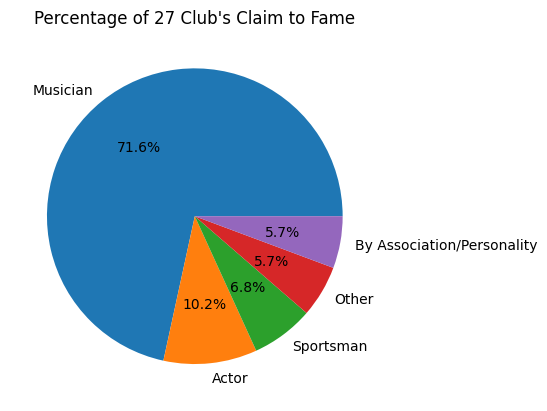

In [91]:
fame_counts = celeb_data_final['Fame Source'].value_counts()

plt.pie(fame_counts, labels=fame_counts.index, autopct='%.1f%%')
plt.title("Percentage of 27 Club's Claim to Fame")


It would seem that the vast majority of the 27 club are musicians with over 70%

What was the most common cause of death?

([<matplotlib.patches.Wedge at 0xb69b578>,
 [Text(0.7778174593052024, 0.7778174593052023, 'Illness'),
  Text(-0.6592054294148775, 0.8805953678222179, 'Vehicle Accident'),
  Text(-1.0306447024076177, -0.38441058440047327, 'Drug Related'),
  Text(-0.2338218253698063, -1.0748615510756405, 'Suicide'),
  Text(0.49237893316206904, -0.9836477957979588, 'Murder'),
  Text(0.9460156618397242, -0.5612970403930068, 'Accident'),
  Text(1.0888035854028022, -0.15654632673430272, 'Unknown')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.3595665978626604, 0.4803247460848461, '20.5%'),
  Text(-0.5621698376768823, -0.2096785005820763, '20.5%'),
  Text(-0.1275391774744398, -0.5862881187685312, '11.4%'),
  Text(0.26857032717931034, -0.5365351613443411, '10.2%'),
  Text(0.5160085428216677, -0.3061620220325491, '8.0%'),
  Text(0.5938928647651648, -0.08538890549143784, '4.5%')])

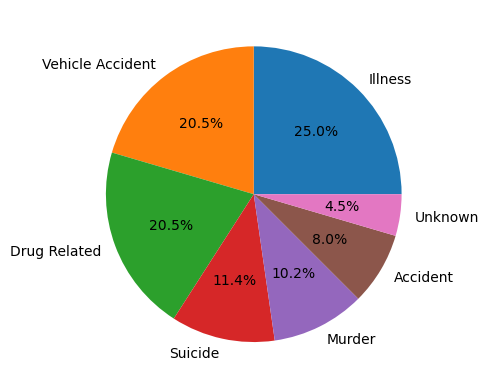

In [95]:
death_counts = celeb_data_final['Death Cause'].value_counts()
plt.pie(death_counts, labels=death_counts.index, autopct='%.1f%%')

Illness is the most common cause of death, but vehicle accidents and drug related deaths are also relatively high compared to the other four options

What was the most common cause of death by celebrity?

In [102]:
pivot_df = celeb_data_final.pivot_table(index='Fame Source', columns='Death Cause', aggfunc='size', fill_value=0)


Text(0.5, 1.0, 'Proportion of Causes of Death by Celebrity')

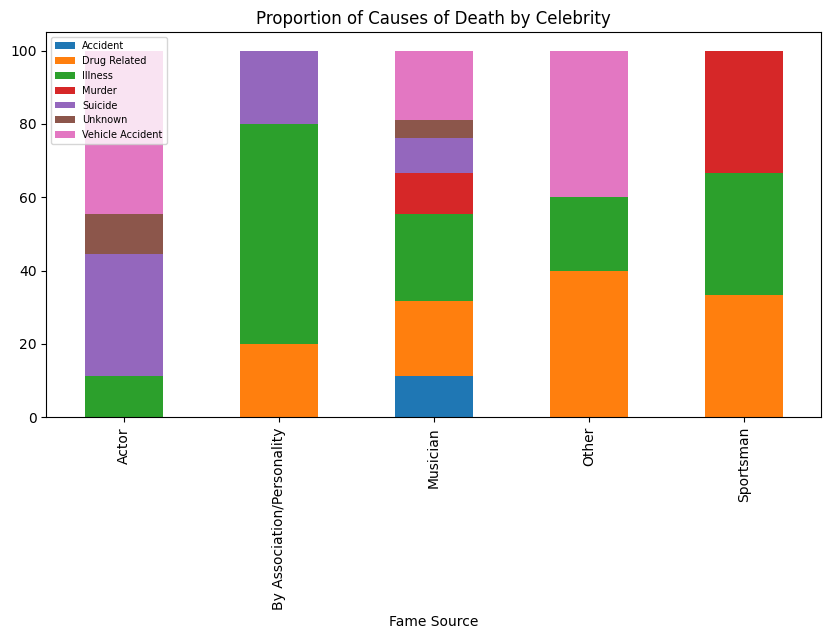

In [130]:
pivot_df_proportions = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with proportions
pivot_df_proportions.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.legend(loc='upper left', prop={'size': 7})
plt.title('Proportion of Causes of Death by Celebrity')


This table is a bit messy to look at and can make figuring out the proportions a bit hard. I'll convert it to a heatmap which will make disinguishing the proportions a bit easier

<AxesSubplot:xlabel='Death Cause', ylabel='Fame Source'>

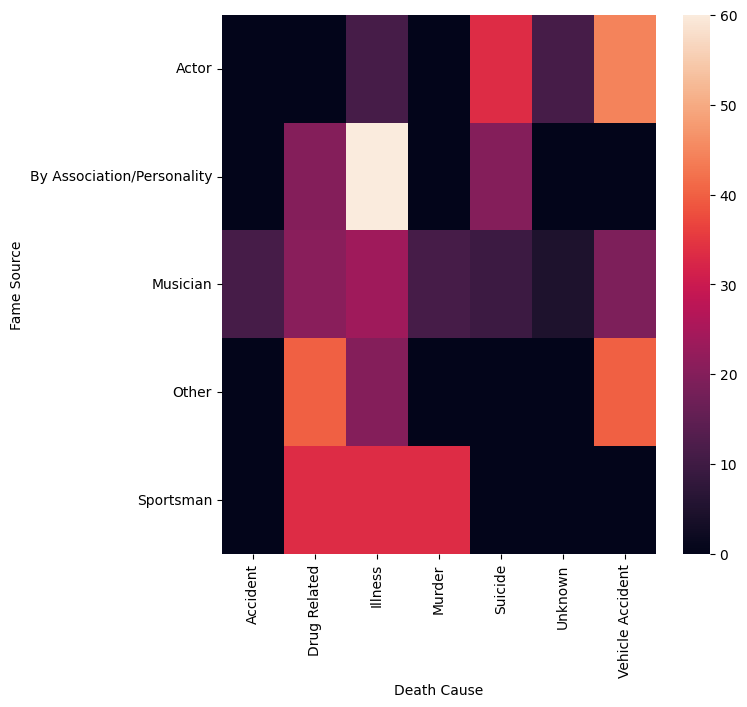

In [149]:
plt.figure(figsize=(7,7))
sns.heatmap(pivot_df_proportions, cbar=True)


Based on these graphs we can draw the following conclusions.<br>
The most common cause of death for Actors is vehicle accidents<br>
Most common for celebrity personalitys is Illness<br>
Musicians seem to have the most causes of death with Vehicle accidents, drug related and illness all being relatively similair<br>
Other types of celebrities are about the same between drug related deaths and vehicle accidents<br>
Sportman are relatively evenly split between murder, illness and drug related (highest proportion of murdered by far)

Now that we know the proportion of deaths, how suspicious are they? What is the proportion of suspicious deaths by celebrity type?
Note -  'Suspicious?' was a column I added in for my own entertainment and should not be considered accurate. If a celebrities death was the result of foul play, e.g. murder, or there was controversy surrounding their death that may have indicated a 'cover up' or foul play, I marked it as suspicious

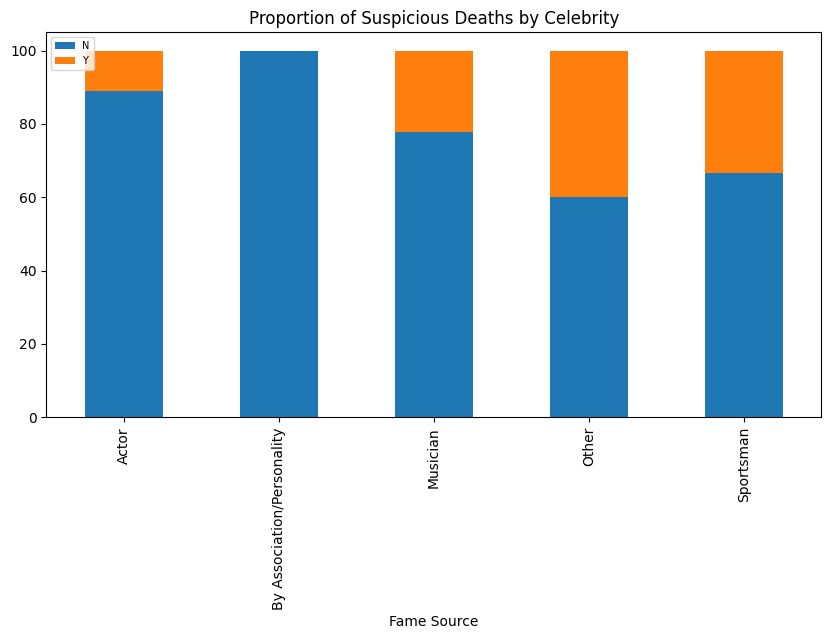

In [141]:
pivot_sus = celeb_data_final.pivot_table(index='Fame Source', columns='Suspicious?', aggfunc='size', fill_value=0)
pivot_sus_proportions = pivot_sus.div(pivot_sus.sum(axis=1), axis=0) * 100
pivot_sus_proportions.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Proportion of Suspicious Deaths by Celebrity')
plt.legend(loc='upper left', prop={'size': 7})

Actor's and personalities had no, or very few suspicious deaths so not much conspiracy there!
20% of Musicians died suspiciously however.. While not a huge amount, it makes you curious for sure. Musicians are also the largest sample size by far, taking up over 70% of the dataset
Around 40% of Sportsman and Others died suspiciously however! This definitely indicates the need for more in depth research to be done 

I wonder now what the proportion is of suspicous deaths by cause of death?

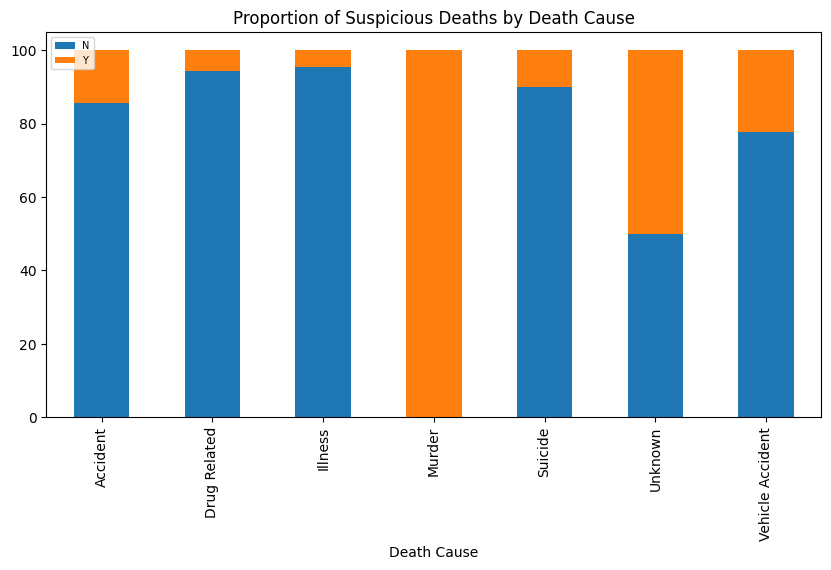

In [142]:
pivot_suss = celeb_data_final.pivot_table(index='Death Cause', columns='Suspicious?', aggfunc='size', fill_value=0)
pivot_suss_proportions = pivot_suss.div(pivot_suss.sum(axis=1), axis=0) * 100
pivot_suss_proportions.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Proportion of Suspicious Deaths by Death Cause')
plt.legend(loc='upper left', prop={'size': 7})

Murder is 100% suspicious, because that is obviously the result of foul play so no suprise there <br>
It seems that about half of the 'Unknown' causes of death were suspicious however.. Unknown cause of death was generally classified as a situation where the celebrity 'disappeared', the autopsy results were never released to the public, or an autopsy was never conducted. Lots of cause for suspicion naturally in those circumstances <br>
Vehicle accidents also had a roughly 20% proportion of suspicious deaths, indication of tampering perhaps?? Reminds me of Princess Diana..